In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
!pip install kneed

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
import seaborn as sns

In [7]:
inpt1=pd.read_csv('CC GENERAL.csv')
inpt1.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [9]:
inpt1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [11]:
inpt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [13]:
inpt1.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [15]:
inpt1.drop('CREDIT_LIMIT', axis=1, inplace=True)
inpt1.drop('MINIMUM_PAYMENTS', axis=1, inplace=True)

In [17]:
inpt1.drop('CUST_ID', axis=1, inplace=True)

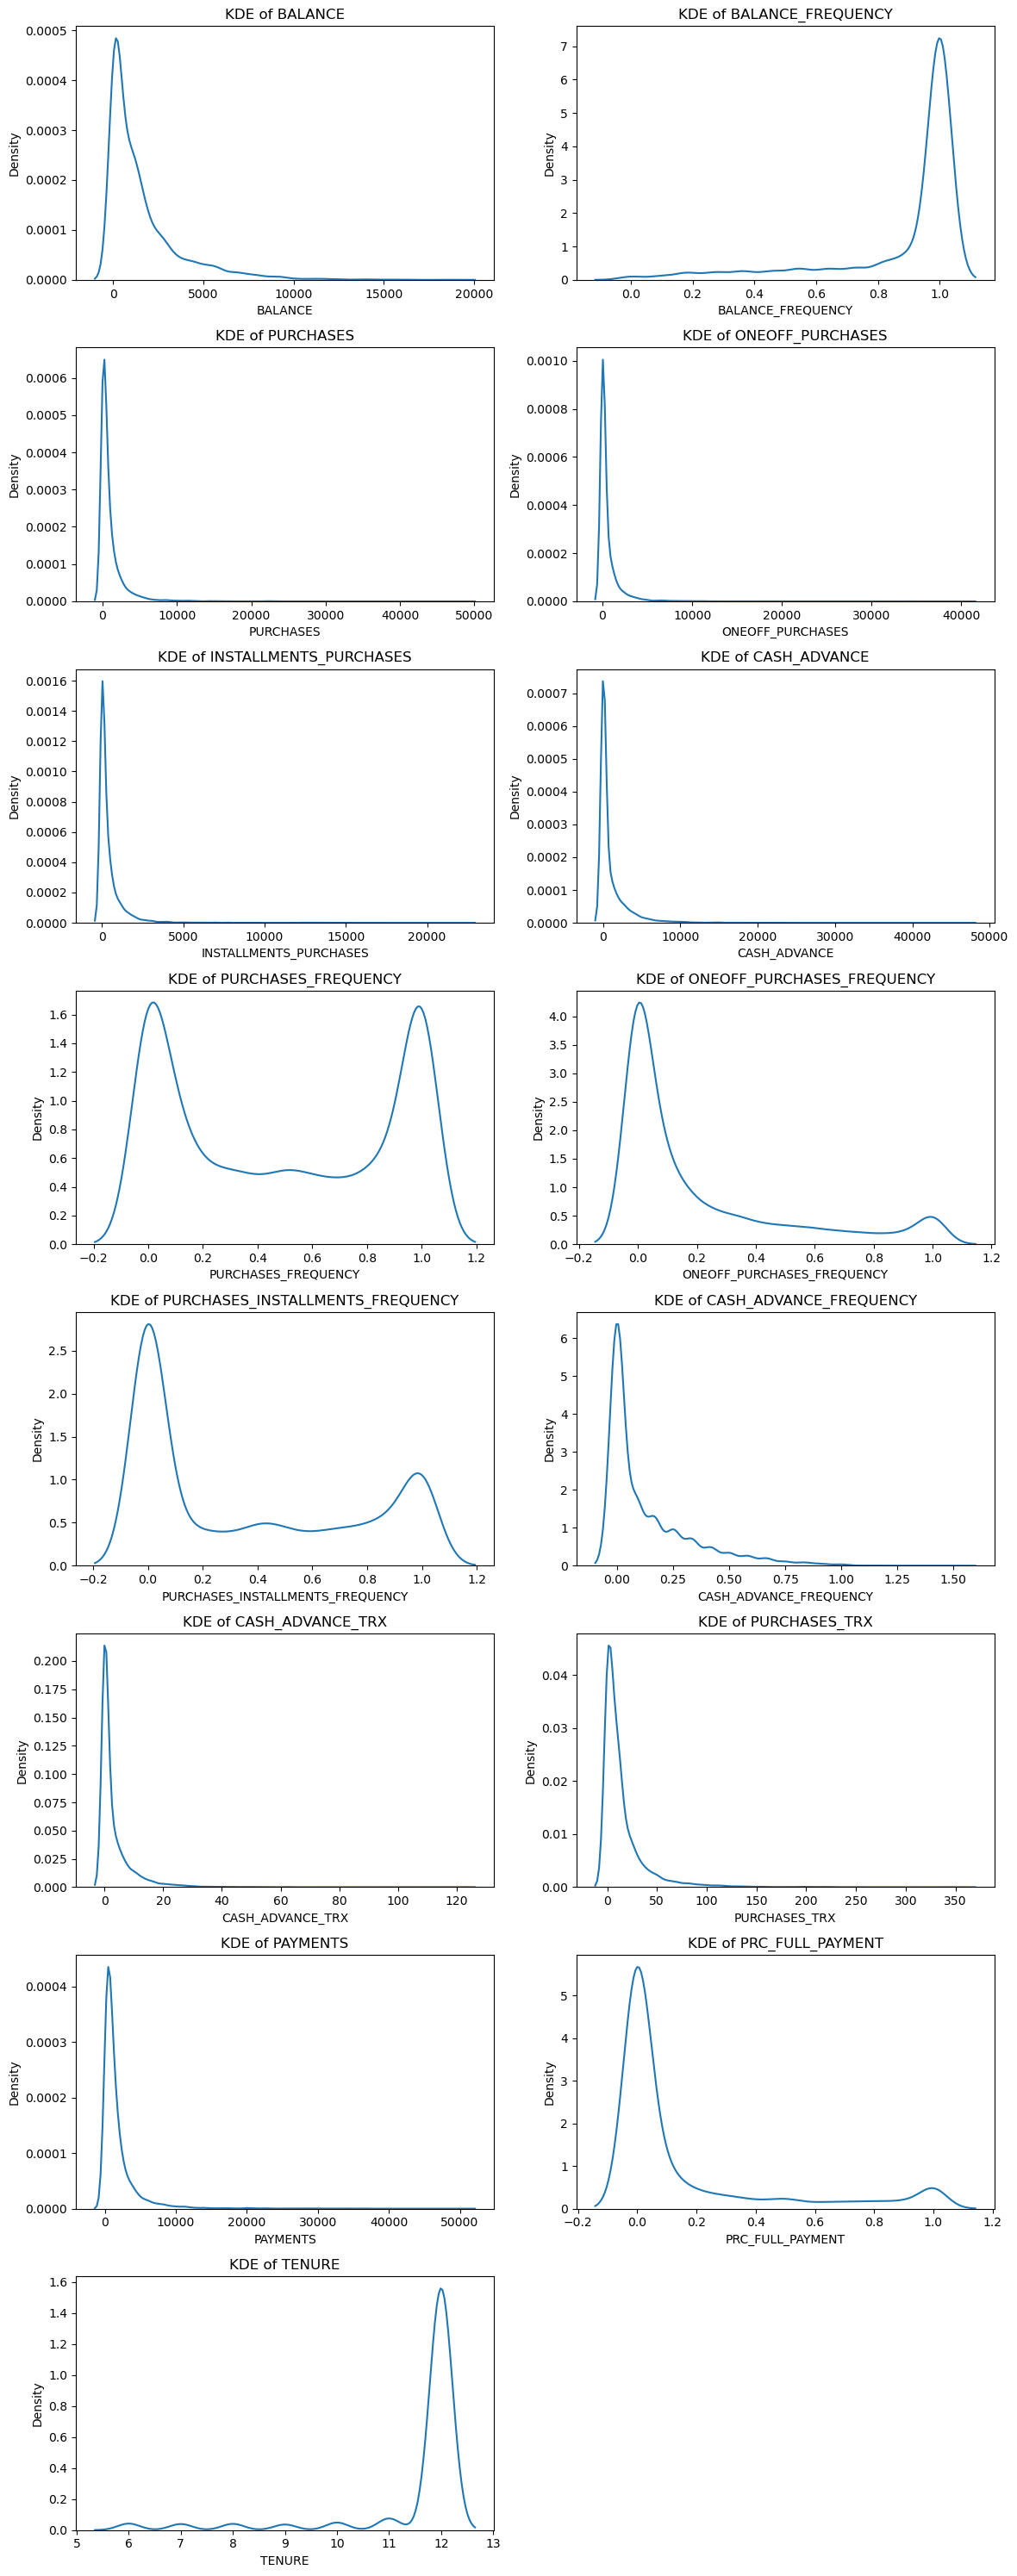

In [19]:
numeric_columns = inpt1.select_dtypes(exclude='object').columns
num_plots = len(numeric_columns)

fig, axes = plt.subplots(nrows=(num_plots // 2) + (num_plots % 2), ncols=2, figsize=(12, num_plots * 2))


axes = axes.flatten()


for i, cl in enumerate(numeric_columns):
    sns.kdeplot(inpt1[cl], ax=axes[i])
    axes[i].set_title(f"KDE of {cl}")


for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

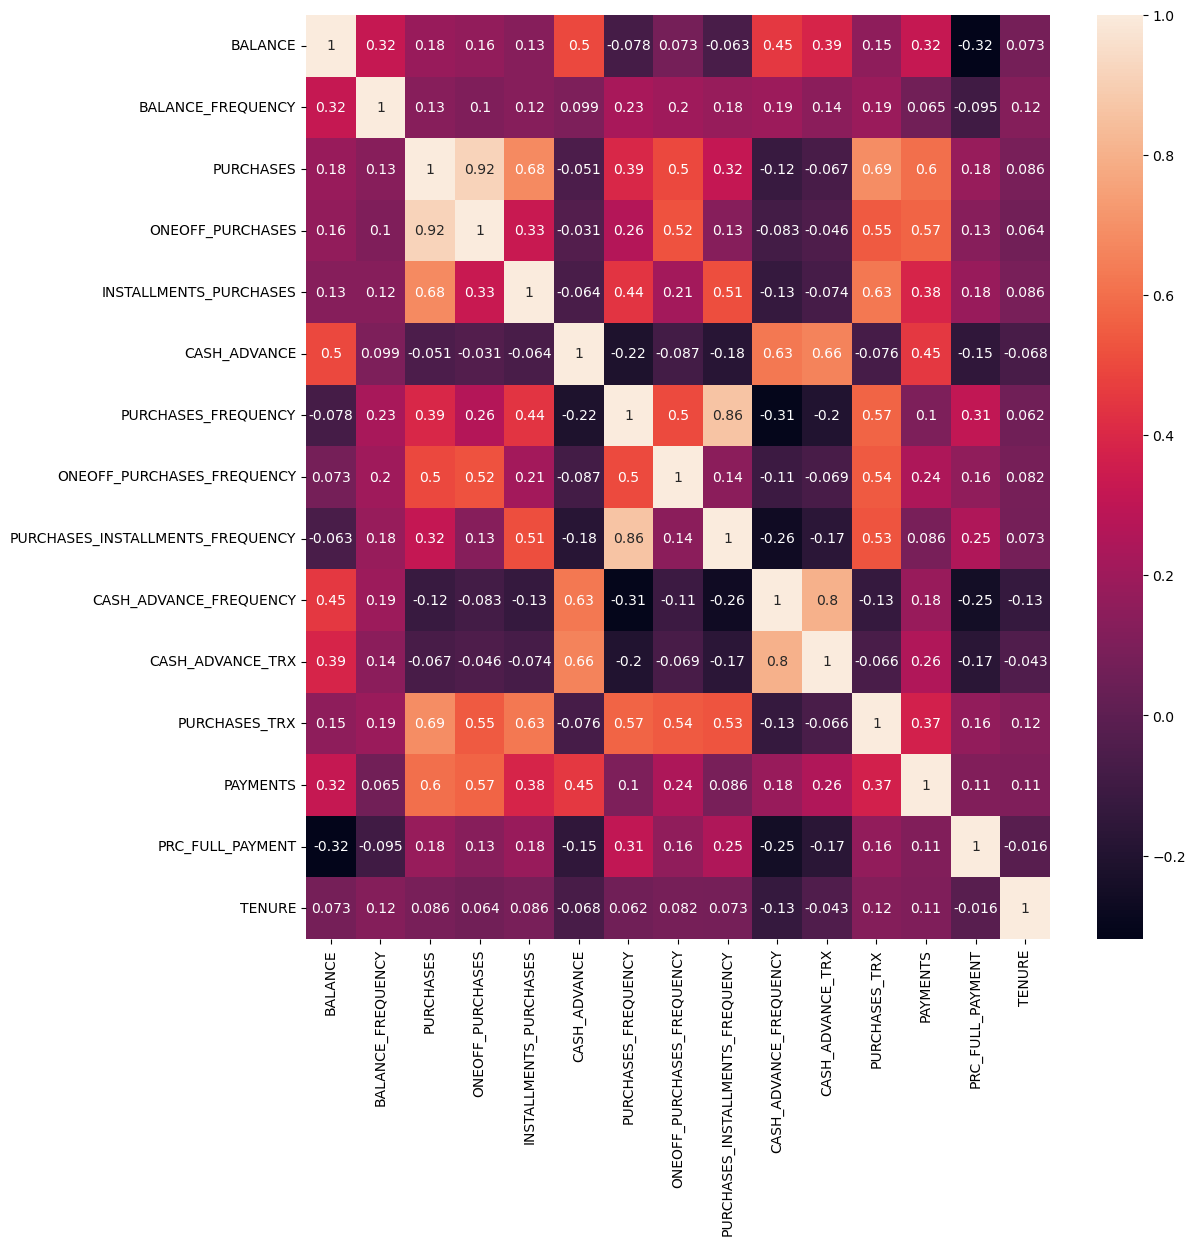

In [25]:
plt.figure(figsize=(12,12))
sns.heatmap(inpt1.corr(), annot=True)
plt.show()

In [29]:
['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [31]:
inpt1.drop(['PURCHASES_TRX','INSTALLMENTS_PURCHASES','ONEOFF_PURCHASES','PURCHASES_FREQUENCY'], axis=1, inplace=True)

In [33]:
ss=StandardScaler()
ss.fit(inpt1)
inpt1=ss.transform(inpt1)

Silhouette Coefficient for num_cluster 2 0.2369075172817349
Silhouette Coefficient for num_cluster 3 0.24850284374974113
Silhouette Coefficient for num_cluster 4 0.22401437761285276
Silhouette Coefficient for num_cluster 5 0.24153899681208704
Silhouette Coefficient for num_cluster 6 0.2546902784595453
Silhouette Coefficient for num_cluster 7 0.23779886202560196
Silhouette Coefficient for num_cluster 8 0.23655037156370806
Silhouette Coefficient for num_cluster 9 0.23727202972318467
Silhouette Coefficient for num_cluster 10 0.22782302856961653
Silhouette Coefficient for num_cluster 11 0.22814757082687545
Silhouette Coefficient for num_cluster 12 0.22719352132148068
Silhouette Coefficient for num_cluster 13 0.23756089622772983
Silhouette Coefficient for num_cluster 14 0.2042885603540345
Silhouette Coefficient for num_cluster 15 0.24619980094076313
Silhouette Coefficient for num_cluster 16 0.2346060495268308
Silhouette Coefficient for num_cluster 17 0.20256235221361077
Silhouette Coefficie

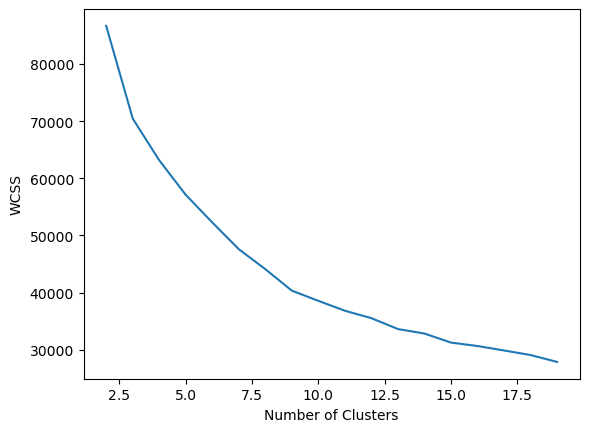

In [35]:
wcss=[]
for i in range(2,20):
    knm=KMeans(n_clusters=i, random_state=0)
    knm.fit(inpt1)
    wcss_vl=knm.inertia_
    wcss.append(wcss_vl)
    print("Silhouette Coefficient for num_cluster",i, silhouette_score(inpt1, knm.labels_))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.plot(np.arange(2,20), wcss)
plt.show()

In [36]:


wcss=[]
for i in range(1,20):
    knm=KMeans(n_clusters=i, random_state=0)
    knm.fit(inpt1)
    wcss_vl=knm.inertia_
    wcss.append(wcss_vl)
kneedle = KneeLocator(np.arange(1,20), wcss, S=1.0, curve='convex', direction='decreasing')
print('The elbow point for the curve is at cluster numeber',kneedle.knee)



The elbow point for the curve is at cluster numeber 7


In [37]:


eps=np.arange(0.1, 0.8, 0.1)
min_samples=np.arange(5,13,1)
for ep, mns in zip(eps, min_samples):
    dbs=DBSCAN(eps=ep, min_samples=mns)
    dbs.fit(inpt1)
    print("Silhouette Coefficient for eps and min_samples",ep,mns,silhouette_score(inpt1, dbs.labels_))



Silhouette Coefficient for eps and min_samples 0.1 5 -0.44855180890108776
Silhouette Coefficient for eps and min_samples 0.2 6 -0.44163356737966186
Silhouette Coefficient for eps and min_samples 0.30000000000000004 7 -0.4040376377129612
Silhouette Coefficient for eps and min_samples 0.4 8 -0.41969069294801736
Silhouette Coefficient for eps and min_samples 0.5 9 -0.40236231372563974
Silhouette Coefficient for eps and min_samples 0.6 10 -0.3179825934786451
Silhouette Coefficient for eps and min_samples 0.7000000000000001 11 -0.3188738060390937
